# Problem definition

:Understanding galaxy evolution: Study of star forming rate(SFR) using COSMOS Lephare Data.


The Cosmic Evolution Survey (COSMOS) is an astronomical survey designed to probe the formation and evolution of about millions of galaxies as a function of both cosmic time (redshift) and the local galaxy environment. Universe contains billions of galaxies , and understanding their physical properties and how they influence the enviroment has been important for modern astrophysics. I have tried to understand the relation the stellar mass and the star formation rate , in  different redshift bins ( 0.5 to 3)

Link of the COSMOS website : https://cosmos.astro.caltech.edu/page/cosmosweb-dr

Link of the main page to download data : https://cosmos2025.iap.fr/



# Dataset selection and Justification
The COSMOS-Web DR1 Catalog has many catalog fits file which has multiple extensions containing different products (e.g., photometry, photo-z, physical parameters, morphological parameters).For this project I have chosen LEPHARE data, which describes its photometric redshifts and physical parameters.
It is a package , which determines the parameters from Spectral Energy distribution (SED) fitting.
The data helps to understand the galaxy evolution and its properties.

In [ ]:
#importing the important libraries
import seaborn as sns
import pandas as pd
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table # this library is imported to read the binary data which is the format of this fits file

In [ ]:
#Astropy table is a powerful tool just like dataframes. astropy.table reads data from fits file
table = Table.read('/content/COSMOSWeb_mastercatalog_v1_lephare.fits', hdu=1)
df = table.to_pandas()
df.to_csv("data_in_csv.csv", index=False)

In [ ]:
table.colnames #extracting the columns stored in Lephare catalog

['zfinal',
 'type',
 'zpdf_med',
 'zpdf_l68',
 'zpdf_u68',
 'zchi2',
 'chi2_best',
 'nbfilt',
 'zp_agn',
 'chi2_agn',
 'mod_agn',
 'mod_star',
 'chi_star',
 'mod_minchi2_phys',
 'ebv_minchi2',
 'law_minchi2',
 'age_minchi2',
 'mass_minchi2',
 'sfr_minchi2',
 'ssfr_minchi2',
 'age_l68',
 'age_med',
 'age_u68',
 'mass_l68',
 'mass_med',
 'mass_u68',
 'sfr_l68',
 'sfr_med',
 'sfr_u68',
 'ssfr_l68',
 'ssfr_med',
 'ssfr_u68',
 'l_nuv',
 'l_r',
 'l_k',
 'mabs_nuv',
 'mabs_r',
 'mabs_j',
 'mabs_k',
 'flag_chandra',
 'zpdf_med_space',
 'zpdf_l68_space',
 'zpdf_u68_space']

In [ ]:
len(table.colnames)# number of columns

43

## Data Cleaning and Preprocessing
I have chosen to study the galaxy whose redshifts lie between 0.5 and 3.
(Note: Higher the redshift , farther back in time we are observing , so z = 0 is our present universe , aif z = 0.5 it means the galaxy is approximately 6 billion light years away)

Out of the 43 columns, I have focused on the zfinal , mass_med , sfr_med


*   zfinal = Photometric redshift estimate, taken as the median of the likelihood distribution if the object is a galaxy
*   mass_med = logarithmic( with base 10)  of galaxy's stellar mass.

*   sfr_med = logarithmic( with base 10)  of star's formation rate



The Lephare data has taken probability distribution of every parameter, so the median is taken for mass and SFR.
To investigate the relationship between these parameters across different redshifts, I have divided the data five distinct bins. Furthermore, to ensure proper analysis, SFR and mass limits have been applied based on histogram observations.








In [ ]:
#Out of all the data of three parameters selecting data of different redshifts
filtered_rows1 = df[(df['zfinal'] > 0.5) & (df['zfinal'] <1)]
filtered_rows2 = df[(df['zfinal'] > 1) & (df['zfinal'] <1.5)]
filtered_rows3 = df[(df['zfinal'] > 1.5) & (df['zfinal'] <2)]
filtered_rows4 = df[(df['zfinal'] > 2) & (df['zfinal'] <2.5)]
filtered_rows5 = df[(df['zfinal'] > 2.5) & (df['zfinal'] <3)]
#selecting  specific columns
filtered_cols1 = filtered_rows1[['zfinal', 'mass_med', 'sfr_med']]
filtered_cols2 = filtered_rows2[['zfinal', 'mass_med', 'sfr_med']]
filtered_cols3 = filtered_rows3[['zfinal', 'mass_med', 'sfr_med']]
filtered_cols4 = filtered_rows4[['zfinal', 'mass_med', 'sfr_med']]
filtered_cols5 = filtered_rows5[['zfinal', 'mass_med', 'sfr_med']]
print(filtered_cols5)


        zfinal  mass_med  sfr_med
23      2.7637   8.99886  0.24192
33      2.8618   7.82843  0.20157
43      2.9160   8.91315  0.43950
78      2.5558   9.77563  0.88938
98      2.9489   8.31988  0.46813
...        ...       ...      ...
783578  2.9169   7.25310 -0.54541
783756  2.7506   8.12408 -0.11637
783888  2.7735   7.34094 -0.44353
783991  2.8286   8.23584 -0.06217
783996  2.5742   7.57451 -0.31140

[31949 rows x 3 columns]


In [ ]:
#to understand the range of values
print(filtered_cols5['sfr_med'].max())
print(filtered_cols5['sfr_med'].min())
print(filtered_cols5['mass_med'].max())
print(filtered_cols5['mass_med'].min())


3.7
-99.9
11.92287
-99.9


In [ ]:
#To make the data more concise
#Taking mass_med between -5 to 12 and sfr_med to be between -12 to 3 ,cnsidering maximum and minimum of both
processed_df1 = filtered_cols1[(filtered_cols1['mass_med']>5)& (filtered_cols1['mass_med']< 12) & (filtered_cols1['sfr_med'] > -12) & (filtered_cols1['sfr_med']< 3)]
processed_df2 = filtered_cols2[(filtered_cols2['mass_med']>5)& (filtered_cols2['mass_med']< 12) & (filtered_cols2['sfr_med'] > -12) & (filtered_cols2['sfr_med']< 3)]
processed_df3  = filtered_cols3[(filtered_cols3['mass_med']>5)& (filtered_cols3['mass_med']< 12) & (filtered_cols3['sfr_med'] > -12) & (filtered_cols3['sfr_med']<3)]
processed_df4 = filtered_cols4[(filtered_cols4['mass_med']>5)& (filtered_cols4['mass_med']< 12) & (filtered_cols4['sfr_med'] > -12) & (filtered_cols4['sfr_med']< 3)]
processed_df5 = filtered_cols5[(filtered_cols5['mass_med']>5)& (filtered_cols5['mass_med']< 12) & (filtered_cols5['sfr_med'] > -12) & (filtered_cols5['sfr_med']< 3)]

print(processed_df1)

        zfinal  mass_med  sfr_med
1       0.9261   8.89948  1.20000
4       0.9253   9.25092 -0.79176
5       0.6265  10.37764  0.94612
18      0.9916   9.49382  0.24590
19      0.9203   7.55744 -0.90304
...        ...       ...      ...
783971  0.6169   7.05391 -1.84459
783978  0.8910   6.67349 -1.09611
783986  0.6546   7.11705 -1.78153
783987  0.5047   6.81923 -1.99701
783999  0.6251   7.17854 -1.69133

[189301 rows x 3 columns]


Initially in the bin 5 there were 31949 galaxies and after applying sfr and mass constraints, I got 30898 galaxies. This kind of filtering is observed in each of the bin

# Exploratory Data Analysis
I have added graphs of histograms of  zfinal ,mass_med and sfr_med to understand its variation.






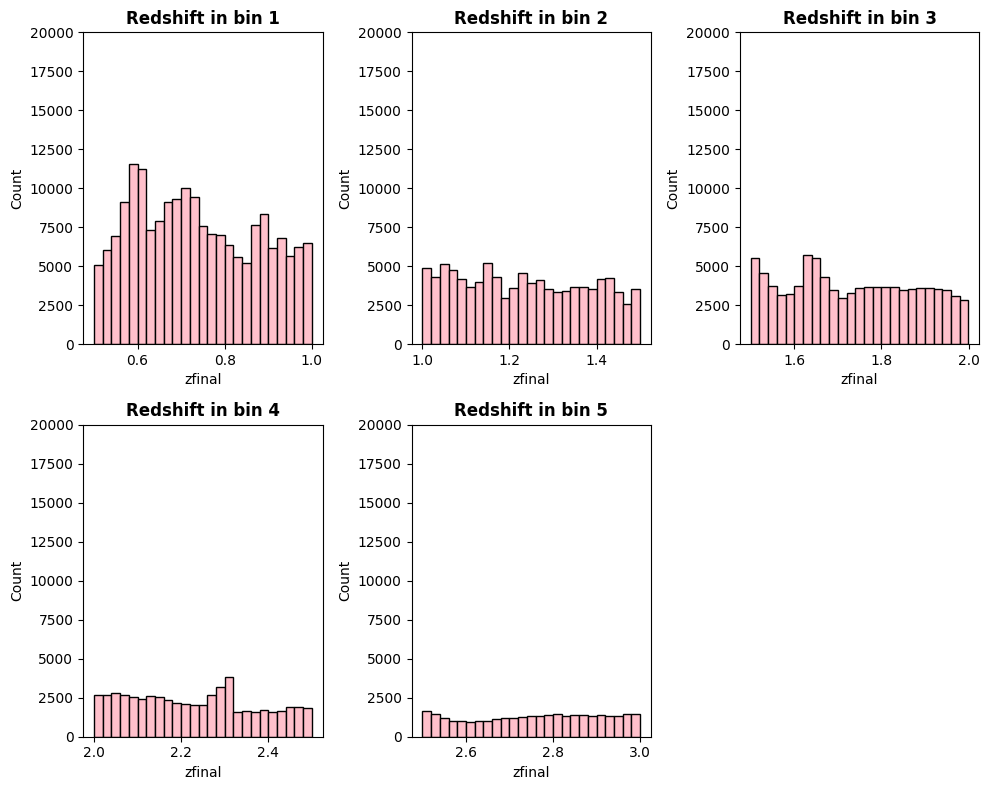

In [ ]:

fig, axes = plt.subplots(2, 3, figsize=(10, 8))
axes = axes.flatten()
#here the data is not in dataframe format but in series
df_z = [processed_df1['zfinal'], processed_df2['zfinal'],processed_df3['zfinal'], processed_df4['zfinal'], processed_df5['zfinal']]
for j , z in enumerate(df_z): # enumerate has been used
  axes[j].hist(z , bins = 25,edgecolor= 'black',color = 'pink')# bins is kept constant for all histograms
  axes[j].set_xlabel('zfinal')
  axes[j].set_ylabel('Count')
  axes[j].set_title(f"Redshift in bin {j+1}", weight = 'bold')
  axes[j].set_ylim(0,20000)# setting a standard limit
fig.delaxes(axes[-1])# to remove last subplot as its empty

plt.tight_layout()
plt.show()


Numbers as observed varies significantly like  number of galaxies are 92350 for z (redshift) = 0.5 to 1 reduces to 30898 for z = 2.5 to 3

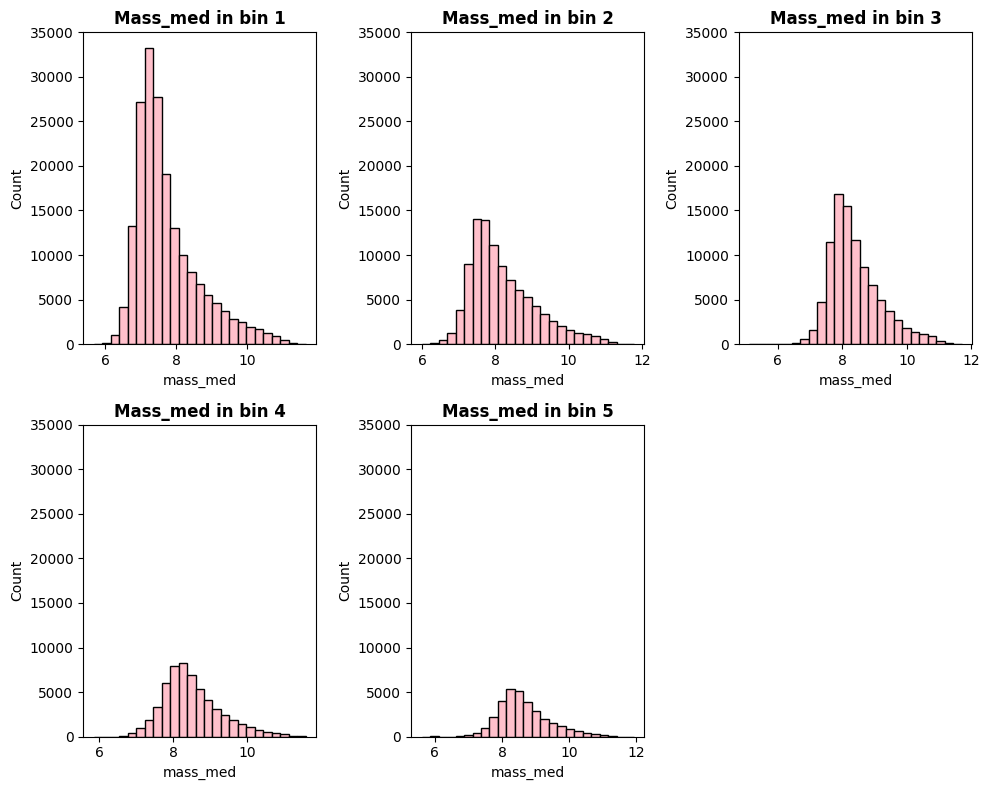

In [ ]:

fig, axes = plt.subplots(2, 3, figsize=(10, 8))
axes = axes.flatten()
#here the data is not in dataframe format but in series
df_z = [processed_df1['mass_med'], processed_df2['mass_med'],processed_df3['mass_med'], processed_df4['mass_med'], processed_df5['mass_med']]
for j , z in enumerate(df_z):
  axes[j].hist(z , bins =25,edgecolor= 'black',color = 'pink')
  axes[j].set_xlabel('mass_med')
  axes[j].set_ylabel('Count')
  axes[j].set_title(f"Mass_med in bin {j+1}", weight = 'bold')
  axes[j].set_ylim(0,35000)
fig.delaxes(axes[-1])# to remove last subplot as its empty

plt.tight_layout()
plt.show()


The graphs are similar to asymmetric curve, and as observed in previous graphs it number reduces with higher redshifts. From graph , it can be implied that the galaxies with higher masses are either hard to determine or it gets filtered while applying constraints.





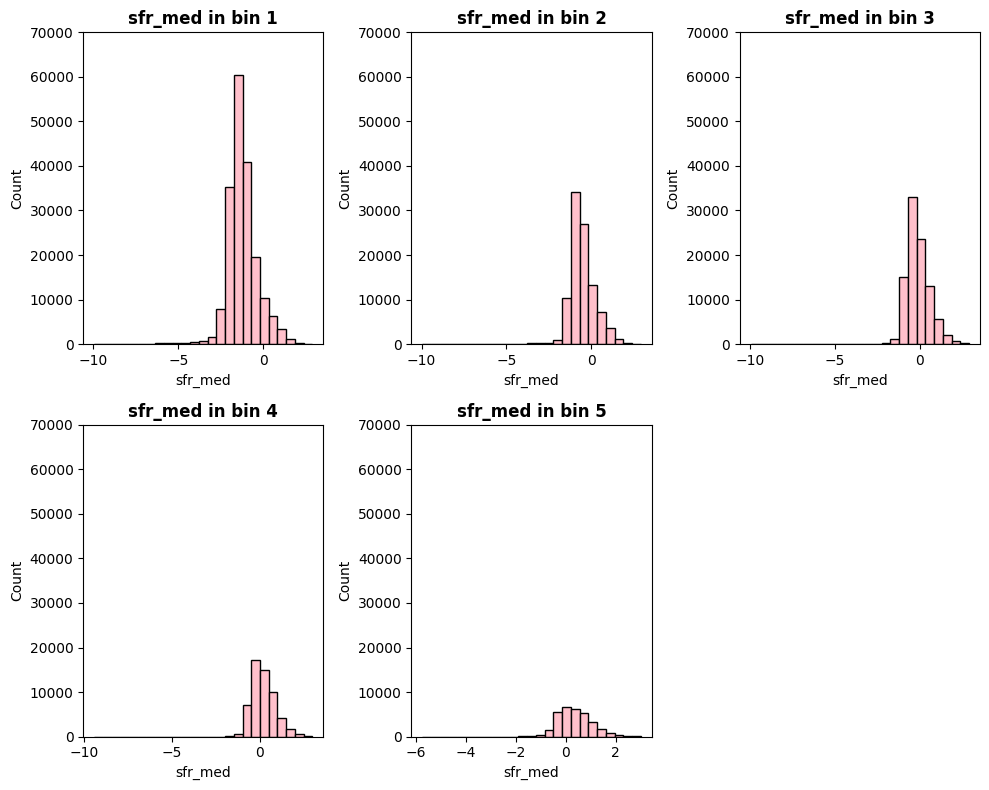

In [ ]:

fig, axes = plt.subplots(2, 3, figsize=(10, 8))
axes = axes.flatten()
#here the data is not in dataframe format but in series
df_z = [processed_df1['sfr_med'], processed_df2['sfr_med'],processed_df3['sfr_med'], processed_df4['sfr_med'], processed_df5['sfr_med']]
for j , z in enumerate(df_z):
  axes[j].hist(z , bins = 25,edgecolor= 'black',color = 'pink')
  axes[j].set_xlabel('sfr_med')
  axes[j].set_ylabel('Count')
  axes[j].set_title(f"sfr_med in bin {j+1}", weight = 'bold')
  axes[j].set_ylim(0,70000)
fig.delaxes(axes[-1])# to remove last subplot as its empty

plt.tight_layout()
plt.show()

Similar pattern is observed in sfr_med too, it is assymetric curve.So the star forming rates in higher redshift galaxies is significantly reducing.

# Modelling and Analysis
I have plotted five graphs representing redshift bins ranging from 0.5 to 3. Using various visualization techniques in Matplotlib, I have aimed to make the plots as clear and visually appealing as possible.

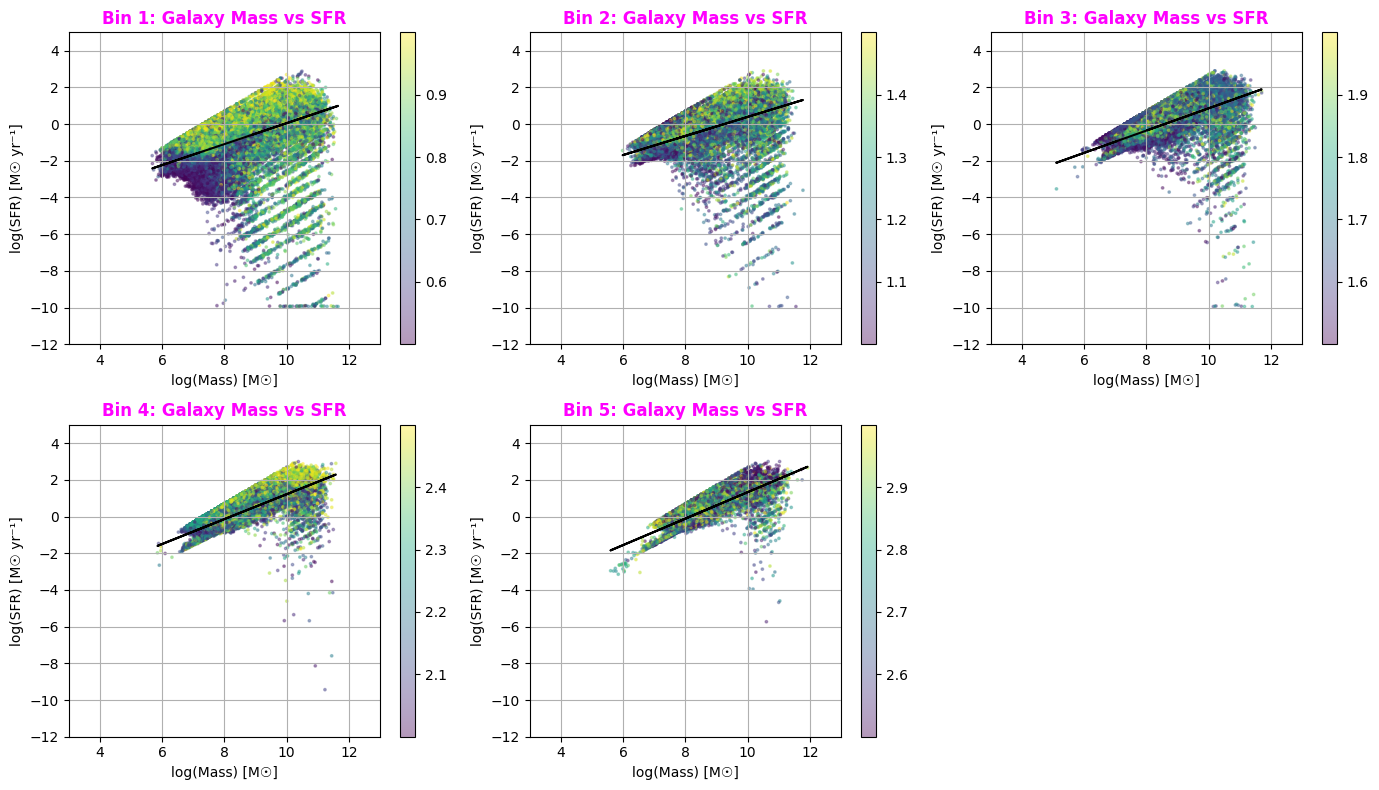

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

fig, axes = plt.subplots(2, 3, figsize=(14, 8)) #figsize = (width, height)

# Flattening axes to loop easily
axes = axes.flatten()


dfs = [processed_df1, processed_df2, processed_df3, processed_df4, processed_df5]

for i, df in enumerate(dfs):# to loop over the 5 dataframes
    ax = axes[i]
    sc = ax.scatter(df['mass_med'], df['sfr_med'],c = df['zfinal'], cmap = 'viridis',s=3,alpha=0.4) # to plot the scatter chart for different redshift bins

    x = df['mass_med'].values.reshape(-1,1)# reshape is used to convert 1 D to 2 D as its a input requiremrnt of skikit-learn
    y = df['sfr_med'].values# extracting values from the columns of dataframes to get regression line
    linear_model = LinearRegression() # this model minimize the residual sum of squares between the observed targets, and the targets predicted by the linear approximation.
    linear_model.fit(x,y)
    y_pre = linear_model.predict(x)

    ax.plot(df['mass_med'], y_pre, color='black')# to plot the regression line
    axes[i].set_title(f"Bin {i+1}: Galaxy Mass vs SFR", weight = 'bold', color = 'magenta')
    axes[i].set_xlabel("log(Mass) [M☉]")
    axes[i].set_ylabel("log(SFR) [M☉ yr⁻¹]")
    axes[i].grid(True)
    axes[i].set_ylim(-12 , 5)
    axes[i].set_xlim(3,13)
    cbar = plt.colorbar(sc, ax=ax)# adding a colorbar of redshift gradient at the side of each bin

fig.delaxes(axes[-1])# to remove last subplot as its empty

plt.tight_layout()
plt.show()




In [ ]:
#To understand the correlation between all three parameters
corr_matrix = df[['zfinal', 'mass_med', 'sfr_med']].corr()
print(corr_matrix)

            zfinal  mass_med   sfr_med
zfinal    1.000000 -0.056985  0.011292
mass_med -0.056985  1.000000  0.790758
sfr_med   0.011292  0.790758  1.000000


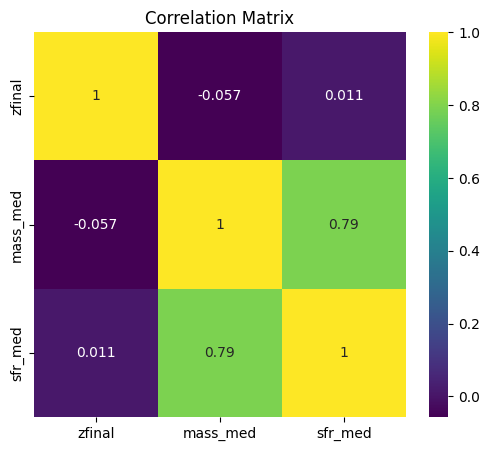

In [ ]:
#the coorelaton is plotted in viridis colormap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title("Correlation Matrix")
plt.show()

# Result and Interpretation
The evolution of the galaxy stellar mass and star formation rate relationship provides key constraints on the stellar mass assembly histories of galaxies.From the plots its observed that for galaxies with lower redshifts , the relation seems fairly tight around the line.As the redshifts increase the numbers of galaxies tend to reduce , maybe because of lack of sufficent data.

The correlation between the parameters shows that mass_med and sfr_med are highly positive correlated.




# Conclusion/Future Work
It can be concluded that each of the bin shows prominent linear relation of stellar mass and star formation rate.

Further in future, I would like to explore other photometric parameters of Lephare data , and learn more about COSMOS to understand the galaxy dynamics.

# References/Data source
Link of the COSMOS website : https://cosmos.astro.caltech.edu/page/cosmosweb-dr

Link of the main page to download data : https://cosmos2025.iap.fr/

File path for data source :/content/COSMOSWeb_mastercatalog_v1_lephare.fits